In [156]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians


%pylab inline
%config InlineBackend.figure_formats = ['retina']

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

sns.set()
pd.set_option('display.max_columns', None)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/envs/basics310/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['cos', 'sin', 'sqrt', 'radians']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [157]:
# def distance(lat1, lon1, lat2, lon2):
#     R = 6371  # radius of the earth in km
#     dLat = math.radians(lat2 - lat1)
#     dLon = math.radians(lon2 - lon1)
#     a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) \
#         * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#     d = R * c  # distance in km
#     return d

In [158]:
def distance(lat1, lon1, lat2, lon2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [159]:

# Load your dataset into a pandas DataFrame
df = pd.read_csv('/Users/masayasugimotohomefolder/Desktop/MarchMadness/0000_completed_dataset_2012-2022.csv')
df

Unnamed: 0  team1_id  team1_score  team2_id  team2_score WLoc  num_ot  \
0             0      1181           77      1314           81    N       0   
1             2      1242           72      1314           69    N       0   
2             9      1417           66      1314           73    N       0   
3            61      1266           63      1314           95    N       0   
4             6      1181           78      1116           69    N       0   
..          ...       ...          ...       ...          ...  ...     ...   
241        1235      1437           90      1452           78    N       0   
242        1239      1437           71      1403           59    N       0   
243        1236      1345           65      1403           78    N       0   
244        1223      1345           76      1139           73    N       0   
245        1224      1452           94      1267           71    N       0   

    team1_position team2_position  team1_seed  team2_seed  strongseed  \
0              X02            W08           2           8           2   
1              Y01            W08           1           8           1   
2              W04            W08           4           8           4   
3              W09            W08           9           8           8   
4              X02            X04           2           4           2   
..             ...            ...         ...         ...         ...   
241            W01            W05           1           5           1   
242            W01            W03           1           3           1   
243            W02            W03           2           3           2   
244            W02            W10           2          10           2   
245            W05            W13           5          13           5   

     weakseed team1_region team2_region  slot team1_teamname  team2_teamname  \
0           8            X            W  R5WX           Duke  North Carolina   
1           8            Y            W  R6CH         Kansas  North Carolina   
2           8            W            W  R3W1           UCLA  North Carolina   
3           9            W            W  R1W8      Marquette  North Carolina   
4           4            X            X  R4X1           Duke        Arkansas   
..        ...          ...          ...   ...            ...             ...   
241         5            W            W  R3W1      Villanova   West Virginia   
242         3            W            W  R4W1      Villanova      Texas Tech   
243         3            W            W  R3W2         Purdue      Texas Tech   
244        10            W            W  R2W2         Purdue          Butler   
245        13            W            W  R2W4  West Virginia        Marshall   

     season          host  host_lat  host_long  team1_lat  team1_long  \
0      2022   new_orleans   29.9667   -90.0500  36.001590  -78.942260   
1      2022   new_orleans   29.9667   -90.0500  38.957351  -95.245870   
2      2022  philadelphia   39.9500   -75.1667  34.068892 -118.443901   
3      2022    fort_worth   32.7400   -97.3600  43.038765  -87.928122   
4      2022     san_diego   32.7150  -117.1625  36.001590  -78.942260   
..      ...           ...       ...        ...        ...         ...   
241    2018        boston   42.3601   -71.0589  40.039388  -75.345457   
242    2018        boston   42.3601   -71.0589  40.039388  -75.345457   
243    2018        boston   42.3601   -71.0589  40.428206  -86.914435   
244    2018       detroit   42.3314   -83.0458  40.428206  -86.914435   
245    2018     san_diego   32.7150  -117.1625  39.634680  -79.953926   

     team2_lat  team2_long     team1_coach_id  team1_pt_school_ncaa  \
0    35.912165  -79.050969  mike-krzyzewski-1                  35.0   
1    35.912165  -79.050969        bill-self-1                  17.0   
2    35.912165  -79.050969      mick-cronin-1                   1.0   
3    35.912165  -79.050969      shaka-smart-1                   0.0  

In [161]:

df['team1_dist'] = df.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team1_lat'], row['team1_long']), axis=1)
df['team2_dist'] = df.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team2_lat'], row['team2_long']), axis=1)


df = df.rename(columns={'exp_win1': 'team1_exp', 'exp_win2': 'team2_exp'})

# Define the list of features to calculate the difference for
features = ["dist", "score","seed", "lat", "long", "pt_school_ncaa", "pt_overall_ncaa", "pt_school_s16", "pt_overall_s16", "pt_school_ff", "pt_overall_ff", "pt_career_school_wins", "pt_career_school_losses", "pt_career_overall_wins", "pt_career_overall_losses", "pt_team_season_wins", "pt_team_season_losses", "pt_coach_season_wins", "pt_coach_season_losses", "fg2pct", "fg3pct", "ftpct", "blockpct", "oppfg2pct", "oppfg3pct", "oppftpct", "oppblockpct", "f3grate", "oppf3grate", "arate", "opparate", "stlrate", "oppstlrate", "tempo", "adjtempo", "oe", "adjoe", "de", "adjde", 'opexpperpart_men','opexpperteam_men', 'rev_men','exp_men','herop_pctof_tpts', 'exp', 'herop_pctof_tpts','n_topp', 'n_topp_fr', 'n_topp_so', 'n_topp_jr', 'n_topp_sr']
#"ap_final", "ap_preseason", "coaches_before_final", "coaches_preseason" has been removed

df

Unnamed: 0  team1_id  team1_score  team2_id  team2_score WLoc  num_ot  \
0             0      1181           77      1314           81    N       0   
1             2      1242           72      1314           69    N       0   
2             9      1417           66      1314           73    N       0   
3            61      1266           63      1314           95    N       0   
4             6      1181           78      1116           69    N       0   
..          ...       ...          ...       ...          ...  ...     ...   
241        1235      1437           90      1452           78    N       0   
242        1239      1437           71      1403           59    N       0   
243        1236      1345           65      1403           78    N       0   
244        1223      1345           76      1139           73    N       0   
245        1224      1452           94      1267           71    N       0   

    team1_position team2_position  team1_seed  team2_seed  strongseed  \
0              X02            W08           2           8           2   
1              Y01            W08           1           8           1   
2              W04            W08           4           8           4   
3              W09            W08           9           8           8   
4              X02            X04           2           4           2   
..             ...            ...         ...         ...         ...   
241            W01            W05           1           5           1   
242            W01            W03           1           3           1   
243            W02            W03           2           3           2   
244            W02            W10           2          10           2   
245            W05            W13           5          13           5   

     weakseed team1_region team2_region  slot team1_teamname  team2_teamname  \
0           8            X            W  R5WX           Duke  North Carolina   
1           8            Y            W  R6CH         Kansas  North Carolina   
2           8            W            W  R3W1           UCLA  North Carolina   
3           9            W            W  R1W8      Marquette  North Carolina   
4           4            X            X  R4X1           Duke        Arkansas   
..        ...          ...          ...   ...            ...             ...   
241         5            W            W  R3W1      Villanova   West Virginia   
242         3            W            W  R4W1      Villanova      Texas Tech   
243         3            W            W  R3W2         Purdue      Texas Tech   
244        10            W            W  R2W2         Purdue          Butler   
245        13            W            W  R2W4  West Virginia        Marshall   

     season          host  host_lat  host_long  team1_lat  team1_long  \
0      2022   new_orleans   29.9667   -90.0500  36.001590  -78.942260   
1      2022   new_orleans   29.9667   -90.0500  38.957351  -95.245870   
2      2022  philadelphia   39.9500   -75.1667  34.068892 -118.443901   
3      2022    fort_worth   32.7400   -97.3600  43.038765  -87.928122   
4      2022     san_diego   32.7150  -117.1625  36.001590  -78.942260   
..      ...           ...       ...        ...        ...         ...   
241    2018        boston   42.3601   -71.0589  40.039388  -75.345457   
242    2018        boston   42.3601   -71.0589  40.039388  -75.345457   
243    2018        boston   42.3601   -71.0589  40.428206  -86.914435   
244    2018       detroit   42.3314   -83.0458  40.428206  -86.914435   
245    2018     san_diego   32.7150  -117.1625  39.634680  -79.953926   

     team2_lat  team2_long     team1_coach_id  team1_pt_school_ncaa  \
0    35.912165  -79.050969  mike-krzyzewski-1                  35.0   
1    35.912165  -79.050969        bill-self-1                  17.0   
2    35.912165  -79.050969      mick-cronin-1                   1.0   
3    35.912165  -79.050969      shaka-smart-1                   0.0  

In [162]:

df = df.select_dtypes(include='number')
df = df.drop(columns=['team1_id', 'team2_id', 'strongseed', 'weakseed', 'season', 'num_ot', 'host_lat', 'host_long', 'Unnamed: 0'])

# Use list comprehension to create new columns for the difference between team1 and team2
df[[f"{feature}_diff" for feature in features]] = df[[f"team1_{feature}" for feature in features]].values - df[[f"team2_{feature}" for feature in features]].values

# Use list comprehension to drop the original team1 and team2 columns
df = df[[col for col in df.columns if not col.startswith("team1_") and not col.startswith("team2_")]]

# create a boolean mask of NaN values
mask = df.isnull()

# identify columns with at least one NaN value
cols_with_nan = mask.any()

# extract column names with NaN values
cols_with_nan_names = cols_with_nan[cols_with_nan == True].index.tolist()

# remove columns with NaN values
df = df.drop(columns=cols_with_nan_names)
df = df.drop(columns=['lat_diff', 'long_diff'])


# print updated dataframe
print(df)

       diff_dist  seed_diff    dist_diff  score_diff  pt_school_ncaa_diff  \
0      13.433263       -6.0    13.433263        -4.0                 35.0   
1    -112.798837       -7.0  -112.798837         3.0                 17.0   
2    3297.221863       -4.0  3297.221863        -7.0                  1.0   
3    -304.336750        1.0  -304.336750       -32.0                  0.0   
4    1368.993149       -2.0  1368.993149         9.0                 34.0   
..           ...        ...          ...         ...                  ...   
241  -363.540062       -4.0  -363.540062        12.0                  4.0   
242 -2412.607153       -2.0 -2412.607153        12.0                 12.0   
243 -1516.152957       -1.0 -1516.152957       -13.0                  9.0   
244     4.720732       -8.0     4.720732         3.0                  9.0   
245   216.384137       -8.0   216.384137        23.0                  8.0   

     pt_overall_ncaa_diff  pt_school_s16_diff  pt_overall_s16_diff  \
0    

In [163]:
df['team1_won'] = np.where(df['score_diff'] < 0, 0, 1)
df

diff_dist  seed_diff    dist_diff  score_diff  pt_school_ncaa_diff  \
0      13.433263       -6.0    13.433263        -4.0                 35.0   
1    -112.798837       -7.0  -112.798837         3.0                 17.0   
2    3297.221863       -4.0  3297.221863        -7.0                  1.0   
3    -304.336750        1.0  -304.336750       -32.0                  0.0   
4    1368.993149       -2.0  1368.993149         9.0                 34.0   
..           ...        ...          ...         ...                  ...   
241  -363.540062       -4.0  -363.540062        12.0                  4.0   
242 -2412.607153       -2.0 -2412.607153        12.0                 12.0   
243 -1516.152957       -1.0 -1516.152957       -13.0                  9.0   
244     4.720732       -8.0     4.720732         3.0                  9.0   
245   216.384137       -8.0   216.384137        23.0                  8.0   

     pt_overall_ncaa_diff  pt_school_s16_diff  pt_overall_s16_diff  \
0                    35.0                25.0                 25.0   
1                    22.0                10.0                 13.0   
2                    12.0                 1.0                  2.0   
3                     8.0                 0.0                  1.0   
4                    31.0                24.0                 23.0   
..                    ...                 ...                  ...   
241                  -9.0                 1.0                 -3.0   
242                  13.0                 5.0                  5.0   
243                   9.0                 3.0                  3.0   
244                  10.0                 3.0                  3.0   
245                  23.0                 4.0                  8.0   

     pt_school_ff_diff  pt_overall_ff_diff  pt_career_school_wins_diff  \
0                 12.0                12.0                      1101.0   
1                  3.0                 3.0                       526.0   
2                  1.0                 1.0                        42.0   
3                  0.0                 1.0                        -5.0   
4                 12.0                12.0                      1055.0   
..                 ...                 ...                         ...   
241                1.0                 0.0                       163.0   
242                2.0                 2.0                       374.0   
243                0.0                 0.0                       251.0   
244                0.0                 0.0                       273.0   
245                1.0                 2.0                       181.0   

     pt_career_school_losses_diff  pt_career_overall_wins_diff  \
0                           299.0                       1174.0   
1                           115.0                        733.0   
2                            20.0                        407.0   
3                             3.0                        267.0   
4                           281.0                       1018.0   
..                            ...                          ...   
241                          36.0                       -233.0   
242                         142.0                        466.0   
243                         125.0                        246.0   
244                         135.0                        287.0   
245                          67.0                        699.0   

     pt_career_overall_losses_diff  pt_team_season_wins_diff  \
0                            358.0                       4.0   
1                            220.0                       4.0   
2                            191.0                       1.0   
3                            145.0                      -5.0   
4                            306.0                       3.0   
..                             ...                       ...   
241                          -65.0                       6.0   
242                          222.0             

In [164]:
# df.to_csv('03142023_all_combined_dataset.csv', index=False)

In [165]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()



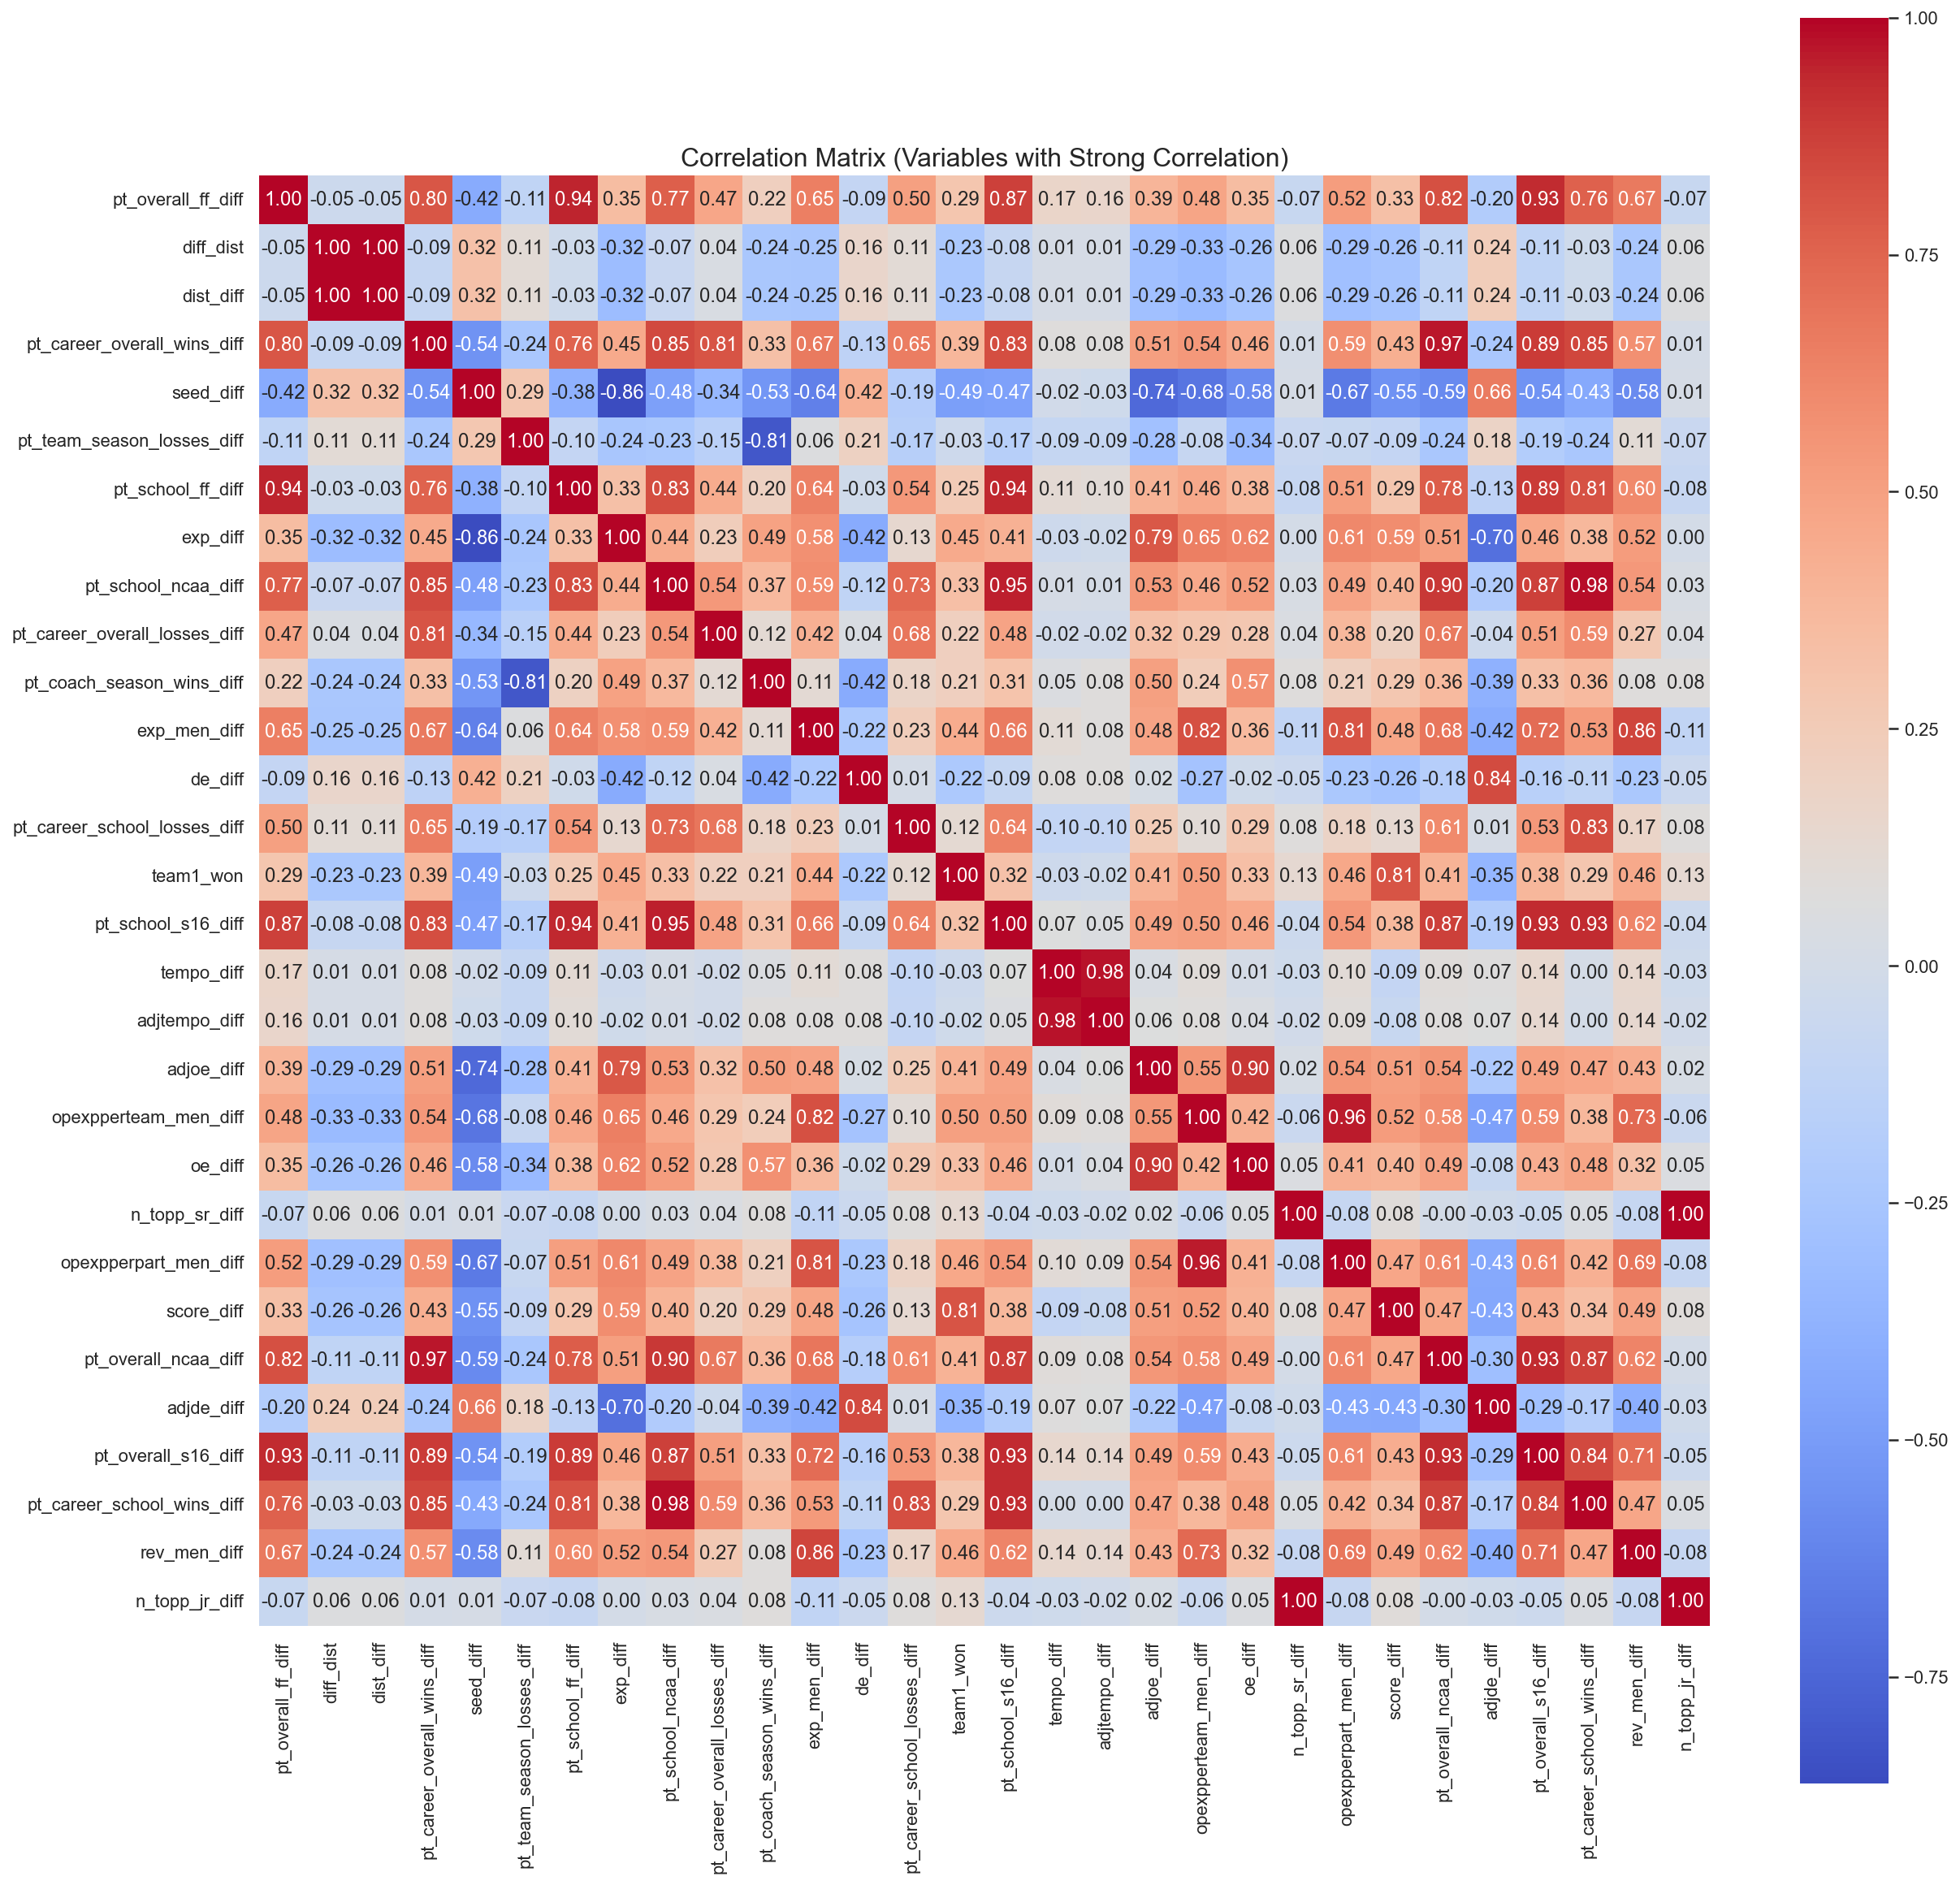

In [166]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the indices where the correlation is greater than 0.8
row, col = np.where(np.abs(corr_matrix) > 0.8)

# Extract the unique variable names from the indices
vars_with_strong_corr = set()
for i in range(len(row)):
    if row[i] != col[i]:
        vars_with_strong_corr.add(corr_matrix.columns[row[i]])
        vars_with_strong_corr.add(corr_matrix.columns[col[i]])

# Create a new correlation matrix with only the variables that have strong correlation
strong_corr_matrix = df[list(vars_with_strong_corr)].corr()

# Create a heatmap to visualize the strong correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(strong_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix (Variables with Strong Correlation)', fontsize=16)
plt.show()


In [167]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the indices where the correlation is greater than 0.8
row, col = np.where(np.abs(corr_matrix) > 0.8)

# Extract the unique variable names from the indices
vars_with_strong_corr = set()
for i in range(len(row)):
    if row[i] != col[i]:
        vars_with_strong_corr.add(corr_matrix.columns[row[i]])
        vars_with_strong_corr.add(corr_matrix.columns[col[i]])

# Create a new correlation matrix with only the variables that have strong correlation
strong_corr_matrix = df[list(vars_with_strong_corr)].corr()

# Set values less than or equal to 0.8 to 0
strong_corr_matrix[strong_corr_matrix <= 0.8] = 0

# Create a heatmap to visualize the strong correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(strong_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix (Variables with Strong Correlation)', fontsize=16)
plt.show()


In [168]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Fit the PCA model on the scaled data
pca = PCA()

# Fit a range of PCA models
pca_list = [pd.Series({'n': n,
                       'model': pca.set_params(n_components=n).fit(scaled_df),
                       'var': pca.explained_variance_ratio_.sum()})
            for n in range(1, 6)]

# Calculate and store feature importances
feature_weight_list = [pd.DataFrame({'n': n,
                                      'features': df.columns,
                                      'values': pca.components_[i] / np.sum(pca.components_[i]**2)}
                                      )
                        for n, pca_model in enumerate(pca_list, start=1)
                        for i in range(pca_model['n'])]

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')


/opt/anaconda3/envs/basics310/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [169]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd


# define feature_cols based on all columns in df except for the target column
feature_cols = [col for col in df.columns if col != 'score_diff']

# split the data into train and test sets
train, test = train_test_split(df, test_size=0.3, random_state=42)

# create the linear regression model
lr = LinearRegression()

# define the feature and target variables for the train and test sets
X_train = train[feature_cols]
y_train = train['score_diff']

X_test  = test[feature_cols]
y_test  = test['score_diff']

# define the pipeline with PCA and linear regression
n = 3 # define the number of PCA components
pipe = Pipeline([
    ('pca', PCA(n_components=n)),
    ('regression', lr)
])

# fit the pipeline on the train set
pipe.fit(X_train, y_train)

# make predictions on the test set
y_pred = pipe.predict(X_test)

# calculate the R-squared score
PCA_r2 = r2_score(y_pred, y_test)
print('PCA R-squared score:', PCA_r2)


PCA R-squared score: -1.3975117498737135


In [170]:
# Separate the target variable (if applicable)
target_val = df['score_diff']
dependent_val = df.drop(columns=['score_diff'])

# Apply PCA to the dataset
pca = PCA(n_components=2) # Choose the number of components to keep
df_pca = pca.fit_transform(dependent_val)

# Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Add the target variable back (if applicable)
if 'target_variable' in dependent_val.columns:
    df_pca['target_variable'] = target

# Display the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)

[0.95408754 0.04367036]


Explained variance ratio measures the proportion of the total variance in the original dataset that is explained by each principal component. In this case, the first principal component explains approximately 51% of the total variance, while the second principal component explains approximately 33% of the total variance.

The sum of the explained variance ratio for all the principal components is equal to 1. In this case, the sum of the first two components is 0.947, indicating that these two components together explain 94% of the total variance in the original dataset.

Knowing the explained variance ratio can be useful in determining how many principal components to retain in the dataset. If the explained variance ratio for the first few components is high (e.g., close to 1), it suggests that these components contain most of the important information in the dataset and can be retained, while the remaining components can be discarded as they contain less important information. In this case, since the first two principal components together explain 84% of the total variance, it might be reasonable to retain these two components and discard the rest, depending on the specific needs of the analysis.

In [171]:
# Apply PCA to the dataset and retain the 20 principal components with the highest variance
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Get the loadings for the 20 principal components
loadings = pca.components_

# Calculate the absolute loadings
abs_loadings = abs(loadings)

# Identify the variables with the highest loadings for each principal component
max_loadings = abs_loadings.argsort(axis=1)[:, ::-1][:, :10]
variable_names = df.columns[max_loadings]

# Print the variables with the highest loadings for each principal component
for i in range(2):
    print('Principal Component', i+1, ':', variable_names[i])

Principal Component 1 : ['rev_men_diff' 'exp_men_diff' 'opexpperteam_men_diff'
 'opexpperpart_men_diff' 'diff_dist' 'dist_diff'
 'pt_career_overall_wins_diff' 'pt_career_school_wins_diff'
 'pt_career_overall_losses_diff' 'pt_career_school_losses_diff']
Principal Component 2 : ['exp_men_diff' 'rev_men_diff' 'opexpperteam_men_diff'
 'opexpperpart_men_diff' 'pt_career_overall_wins_diff' 'dist_diff'
 'diff_dist' 'pt_career_school_wins_diff' 'pt_career_overall_losses_diff'
 'pt_career_school_losses_diff']


/var/folders/g_/04p97v5d5715hswqq2cznbx80000gn/T/ipykernel_43032/2844752696.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  variable_names = df.columns[max_loadings]


In [172]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Standardize the data
X = (df - df.mean()) / df.std()

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)
PC = pca.transform(X)

# Determine variables contributing to each principal component
PC_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.columns)
PC_df['abs_PC1'] = np.abs(PC_df['PC1'])
PC_df['abs_PC2'] = np.abs(PC_df['PC2'])
PC_df = PC_df.sort_values(by='abs_PC1', ascending=False).head(10) # top 10 variables contributing to PC1
PC_df = PC_df.sort_values(by='abs_PC2', ascending=False).head(10) # top 10 variables contributing to PC2

# Visualize the results
plt.scatter(PC[:,0], PC[:,1], alpha=0.5) # Scatterplot of first two principal components
plt.xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0])) # label x-axis with percentage of explained variance for PC1
plt.ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1])) # label y-axis with percentage of explained variance for PC2
plt.show()


In [173]:
# Retain variables with highest loadings on first two principal components
PC1_vars = list(PC_df.sort_values(by='abs_PC1', ascending=False).index[:5])
PC2_vars = list(PC_df.sort_values(by='abs_PC2', ascending=False).index[:5])
selected_vars = list(set(PC1_vars + PC2_vars)) # combine the top 5 variables from PC1 and PC2
pca_reduced_data = df[selected_vars]

In [174]:
pca_reduced_data

pt_overall_ff_diff  pt_overall_ncaa_diff  pt_career_overall_wins_diff  \
0                  12.0                  35.0                       1174.0   
1                   3.0                  22.0                        733.0   
2                   1.0                  12.0                        407.0   
3                   1.0                   8.0                        267.0   
4                  12.0                  31.0                       1018.0   
..                  ...                   ...                          ...   
241                 0.0                  -9.0                       -233.0   
242                 2.0                  13.0                        466.0   
243                 0.0                   9.0                        246.0   
244                 0.0                  10.0                        287.0   
245                 2.0                  23.0                        699.0   

     pt_school_ncaa_diff  pt_overall_s16_diff  pt_career_school_wins_diff  \
0                   35.0                 25.0                      1101.0   
1                   17.0                 13.0                       526.0   
2                    1.0                  2.0                        42.0   
3                    0.0                  1.0                        -5.0   
4                   34.0                 23.0                      1055.0   
..                   ...                  ...                         ...   
241                  4.0                 -3.0                       163.0   
242                 12.0                  5.0                       374.0   
243                  9.0                  3.0                       251.0   
244                  9.0                  3.0                       273.0   
245                  8.0                  8.0                       181.0   

     pt_school_s16_diff  seed_diff  pt_school_ff_diff  
0                  25.0       -6.0               12.0  
1                  10.0       -7.0                3.0  
2                   1.0       -4.0                1.0  
3                   0.0        1.0                0.0  
4                  24.0       -2.0               12.0  
..                  ...        ...                ...  
241                 1.0       -4.0                1.0  
242                 5.0       -2.0                2.0  
243                 3.0       -1.0                0.0  
244                 3.0       -8.0                0.0  
245                 4.0       -8.0                1.0  

[246 rows x 9 columns]

In [175]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

import numpy as np
import pandas as pd

# Split the data into X (features) and y (target variable)
X = df.drop('score_diff', axis=1)
y = df['score_diff']

# Fit a Lasso regression model with cross-validation to determine the optimal alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)
alpha = lasso.alpha_

# Fit a Lasso regression model with the optimal alpha and obtain the coefficient estimates
lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X, y)
coef = lasso.coef_

# Extract the selected features and create a new dataset with only those features
selected_vars = X.columns[coef != 0]
lasso_reduced_data = df[selected_vars]


In [176]:
lasso_reduced_data

opexpperteam_men_diff  rev_men_diff
0                -966938.0     7152031.0
1                  39367.0    -9776272.0
2                 192370.0   -15194640.0
3                1220017.0    -6498519.0
4                -239659.0    14655443.0
..                     ...           ...
241               374334.0     5165357.0
242              1794478.0     4324337.0
243               279766.0     3317949.0
244               656621.0     5542160.0
245              2072451.0     3816271.0

[246 rows x 2 columns]

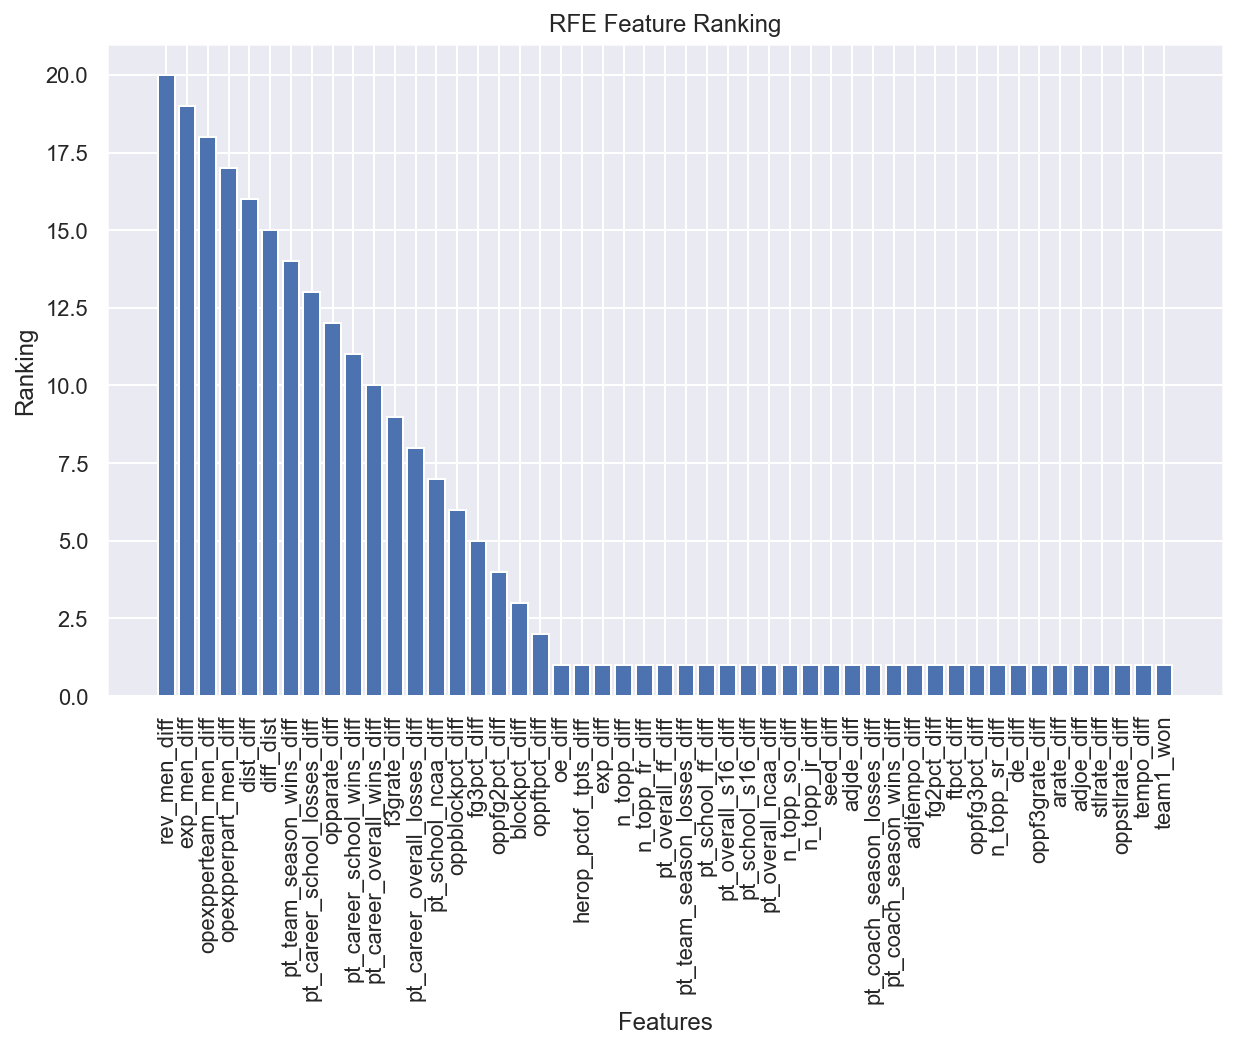

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the model for feature selection
model = LinearRegression()

# Perform RFE
n_features = 30
rfe = RFE(estimator=model, n_features_to_select=n_features)
rfe.fit(X, y)

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Sort the feature ranking in descending order
idx = np.argsort(feature_ranking)[::-1]
feature_ranking = feature_ranking[idx]
feature_names = X.columns[idx]

# Create a bar chart of feature rankings
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.xticks(range(len(feature_ranking)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('RFE Feature Ranking')
plt.show()


# Select the most important features
important_features = X.columns[rfe.support_]


In [178]:
selected_columns = ['team1_won','diff_dist','arate_diff', 'pt_team_season_wins_diff', 'fg3pct_diff', 'pt_career_school_wins_diff']
rfe_df = df[selected_columns]

In [179]:
rfe_df

team1_won    diff_dist  arate_diff  pt_team_season_wins_diff  \
0            0    13.433263    3.368695                       4.0   
1            1  -112.798837    0.283016                       4.0   
2            0  3297.221863   -3.618421                       1.0   
3            0  -304.336750    5.782777                      -5.0   
4            1  1368.993149    4.086092                       3.0   
..         ...          ...         ...                       ...   
241          1  -363.540062   -0.493212                       6.0   
242          1 -2412.607153   -1.412355                       6.0   
243          0 -1516.152957    4.133757                       4.0   
244          1     4.720732   11.364877                       8.0   
245          1   216.384137   -4.235515                       0.0   

     fg3pct_diff  pt_career_school_wins_diff  
0       0.614296                      1101.0  
1      -0.680581                       526.0  
2      -1.063127                        42.0  
3      -1.486480                        -5.0  
4       6.164258                      1055.0  
..           ...                         ...  
241     4.493809                       163.0  
242     3.201812                       374.0  
243     5.417249                       251.0  
244     6.437187                       273.0  
245    -0.283075                       181.0  

[246 rows x 6 columns]

In [180]:
common_columns = list(set(lasso_reduced_data.columns) & set(pca_reduced_data.columns))
common_columns

[]

In [181]:
# final_df = pd.merge(lasso_reduced_data, pca_reduced_data, on=common_columns, how='inner')

In [182]:
# common_columns = list(set(final_df.columns) & set(rfe_df.columns))
# # Merge the dataframes
# final_df = pd.merge(final_df, rfe_df, on=common_columns, how='inner')

# # Restrict the number of rows to the same as lasso_reduced_data
# final_df = final_df.iloc[:len(lasso_reduced_data), :]
# final_df

In [183]:
df.to_csv('0001_2012_2022_dataset_difference_all_features.csv', index=False)

In [184]:
columns_to_extract = [
 'diff_dist',
 'seed_diff',
 'pt_career_school_wins_diff',
 'pt_career_overall_wins_diff',
 'pt_team_season_wins_diff',
 'adjoe_diff',
 'adjde_diff',
 'pt_school_ff_diff',
 'pt_overall_ncaa_diff',
 'pt_school_ncaa_diff',
 'arate_diff',
 'fg3pct_diff',
 'opexpperpart_men_diff',
#  'opexpperteam_men_diff',
 'rev_men_diff',
#  'exp_men_diff',
 'herop_pctof_tpts_diff',
 'exp_diff',
 'team1_won'
]

df_extracted = df.loc[:, columns_to_extract]

In [185]:
df_extracted

diff_dist  seed_diff  pt_career_school_wins_diff  \
0      13.433263       -6.0                      1101.0   
1    -112.798837       -7.0                       526.0   
2    3297.221863       -4.0                        42.0   
3    -304.336750        1.0                        -5.0   
4    1368.993149       -2.0                      1055.0   
..           ...        ...                         ...   
241  -363.540062       -4.0                       163.0   
242 -2412.607153       -2.0                       374.0   
243 -1516.152957       -1.0                       251.0   
244     4.720732       -8.0                       273.0   
245   216.384137       -8.0                       181.0   

     pt_career_overall_wins_diff  pt_team_season_wins_diff  adjoe_diff  \
0                         1174.0                       4.0       6.322   
1                          733.0                       4.0       6.353   
2                          407.0                       1.0       3.032   
3                          267.0                      -5.0      -3.249   
4                         1018.0                       3.0       8.311   
..                           ...                       ...         ...   
241                       -233.0                       6.0       9.800   
242                        466.0                       6.0      13.600   
243                        246.0                       4.0       9.300   
244                        287.0                       8.0       7.600   
245                        699.0                       0.0       4.000   

     adjde_diff  pt_school_ff_diff  pt_overall_ncaa_diff  pt_school_ncaa_diff  \
0       -1.3467               12.0                  35.0                 35.0   
1       -3.0902                3.0                  22.0                 17.0   
2       -5.7650                1.0                  12.0                  1.0   
3       -1.2091                0.0                   8.0                  0.0   
4        3.6381               12.0                  31.0                 34.0   
..          ...                ...                   ...                  ...   
241      1.4000                1.0                  -9.0                  4.0   
242      5.7000                2.0                  13.0                 12.0   
243      2.5000                0.0                   9.0                  9.0   
244     -5.3000                0.0                  10.0                  9.0   
245     -4.4000                1.0                  23.0                  8.0   

     arate_diff  fg3pct_diff  opexpperpart_men_diff  rev_men_diff  \
0      3.368695     0.614296                36140.0     7152031.0   
1      0.283016    -0.680581               103227.0    -9776272.0   
2     -3.618421    -1.063127               113427.0   -15194640.0   
3      5.782777    -1.486480               181937.0    -6498519.0   
4      4.086092     6.164258               -15977.0    14655443.0   
..          ...          ...                    ...           ...   
241   -0.493212     4.493809                 1513.0     5165357.0   
242   -1.412355     3.201812                84618.0     4324337.0   
243    4.133757     5.417249                11832.0     3317949.0   
244   11.364877     6.437187                32290.0     5542160.0   
245   -4.235515    -0.283075               129528.0     3816271.0   

     herop_pctof_tpts_diff  exp_diff  team1_won  
0                 0.001491  0.062374          0  
1                 0.040712  0.072066          1  
2                 0.006535  0.072381          0  
3                 0.017414 -0.024040          0  
4                -0.031815  0.024191          1  
..                     ...       ...        ...  
241               0.006447  0.075336          1  
242              -0.011965  0.059899          1  
243              -0.001741  0.057677          0  
244              -0.038218  0.182168          1  
245              -0.058380  0.180845          1  

[246 r

In [186]:
df_extracted.to_csv('0001_2012_2022_dataset_difference.csv', index=False)